# Importing the Required Libraries

In [1]:
import turicreate as gl
import pandas as pd
from math import floor
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Loading and Exploring the Data

In [2]:
heart=gl.SFrame("heartBNG.csv")


Finished parsing file /home/guru2804/venv/heartBNG.csv

Parsing completed. Parsed 100 lines in 5.2002 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,str,str,float,float,str,str,float,str,float,str,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 504273 lines. Lines per second: 98736.6

Finished parsing file /home/guru2804/venv/heartBNG.csv

Parsing completed. Parsed 1000000 lines in 6.14452 secs.

In [3]:
heart.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
53.63352,male,typ_angina,150.488216,274.020477,f,left_vent_hyper,94.339528,no,1.440151
55.83543,male,non_anginal,129.166976,192.775334,t,left_vent_hyper,148.979664,no,1.929202
44.684172,female,asympt,179.551313,200.892375,f,left_vent_hyper,135.550951,yes,1.873468
64.986164,male,asympt,137.963867,351.187556,f,normal,102.496924,yes,3.38148
69.541123,male,atyp_angina,115.257878,270.263617,f,normal,112.400592,no,0.0
61.169114,male,non_anginal,141.429863,236.361026,f,normal,97.145113,no,4.370753
60.159112,male,asympt,121.252761,262.148887,f,left_vent_hyper,145.490978,yes,3.712546
67.124079,female,atyp_angina,112.999493,174.301934,f,left_vent_hyper,157.888987,no,0.0
57.792209,female,typ_angina,125.371383,275.850822,f,normal,184.815525,yes,0.346362
50.393335,male,asympt,122.214954,250.305515,f,left_vent_hyper,118.119933,yes,0.180811


In [4]:
print("The Size of The Dataset {}".format(len(heart)))

The Size of The Dataset 1000000


In [5]:
print(heart["sex"].unique())
print(heart["cp"].unique())
print(heart["restecg"].unique())
print(heart["fbs"].unique())
print(heart["num"].unique())
print(heart["exang"].unique())
print(heart["slope"].unique())
print(heart["thal"].unique())
print(heart["ca"].unique())

['male', 'female']
['non_anginal', 'asympt', 'typ_angina', 'atyp_angina']
['st_t_wave_abnormality', 'normal', 'left_vent_hyper']
['f', 't']
['>50_2', '<50', '>50_3', '>50_1', '>50_4']
['no', 'yes']
['flat', 'up', 'down']
['normal', 'fixed_defect', 'reversable_defect']
[2, 0, 3, 1]


# Analysing the Features 

In [6]:
gl.visualization.set_target("auto") # Setting up Python Notebook for Visualization
affected=heart[heart["num"]!="<50"]
notaffected=heart[heart["num"]=="<50"]

# 1.Num (The Target)


In [7]:
print("Number of People Affected By Heart Disease: {}".format(len(affected)))
print("Number of People Not Affected By Heart Disease:{}".format(len(notaffected)))
print("Percentage of People Affected By Heart Disease: {}".format(round((len(affected)/len(heart)*100),2)))
print("Percentage of People Not Affected By Heart Disease: {}".format(round((len(notaffected)/len(heart)*100),2)))


Number of People Affected By Heart Disease: 458564
Number of People Not Affected By Heart Disease:541436
Percentage of People Affected By Heart Disease: 45.86
Percentage of People Not Affected By Heart Disease: 54.14


# 2.Age

In [8]:
affected["age"].show(xlabel="Age",title="Age Distribution")
notaffected["age"].show(xlabel="Age",title="Age Distribution")

Materializing SArray

Materializing SArray

In [9]:
print("Minimum and Maximum Age of Affected People:{Min} - {Max}".format(Min=round(affected["age"].min()),Max=round(affected["age"].max())))

Minimum and Maximum Age of Affected People:27 - 82


# 3.Sex

In [10]:
affected["sex"].show(ylabel="Sex")
notaffected["sex"].show(ylabel="Sex")

Materializing SArray

Materializing SArray

In [11]:
print("Number of Men Affected By Heart Disease:{}".format(len(affected[affected["sex"]=="male"])))
print("Number of Women Affected By Heart Disease:{}".format(len(affected[affected["sex"]=="female"])))

Number of Men Affected By Heart Disease:375993
Number of Women Affected By Heart Disease:82571


# 4.Chest Pain

In [12]:
affected["cp"].show(ylabel="Chest Paintype")
notaffected["cp"].show(ylabel="Chest Paintype")

Materializing SArray

Materializing SArray

From the above it can be seen that people with asymptomatic anginal chest pain are more prone to heart disease

# 5.Trestbps

In [13]:
affected["trestbps"].show(xlabel="Blood Pressure")
notaffected["trestbps"].show(xlabel="Blood Pressure")

Materializing SArray

Materializing SArray

In [14]:
print("Minimum and Maximum Blood Pressure of Affected People:{Min} - {Max}".format(Min=round(affected["trestbps"].min()),Max=round(affected["trestbps"].max())))

Minimum and Maximum Blood Pressure of Affected People:86 - 209


# 6. Cholestrol

In [15]:
affected["chol"].show(xlabel="Serum Cholestrol in mm/HG")
notaffected["chol"].show(xlabel="Serum Cholestrol in mm/HG")

Materializing SArray

Materializing SArray

# 7.fbs

In [16]:
affected["fbs"].show(ylabel="Blood Sugar")
notaffected["fbs"].show(ylabel="Blood Sugar")

Materializing SArray

Materializing SArray

# 8.RestECG

In [17]:
affected["restecg"].show(ylabel="ECG")
notaffected["restecg"].show(ylabel="ECG")

Materializing SArray

Materializing SArray

From the above it can be seen that people having left_vent_hyper are more prone to heart disease

# 9.Thalach

In [18]:
affected["thalach"].show()
notaffected["thalach"].show()

Materializing SArray

Materializing SArray

# 10.Exang

In [19]:
affected["exang"].show(xlabel="Exercise induced Angina")
notaffected["exang"].show(xlabel="Exercise induced Angina")

Materializing SArray

Materializing SArray

In [20]:
print("Persons Who had Exercise induced Angina:{}".format(len(affected[affected["exang"]=="yes"])))
print("Persons who dont have Exercise Induced Angina:{}".format(len(affected[affected["exang"]=="no"])))

Persons Who had Exercise induced Angina:253438
Persons who dont have Exercise Induced Angina:205126


# 11.OldPeak

In [21]:
affected["oldpeak"].show()
notaffected["oldpeak"].show()

Materializing SArray

Materializing SArray

# 12.Slope

In [22]:
affected["slope"].show(ylabel="slope")
notaffected["slope"].show(ylabel="slope")

Materializing SArray

Materializing SArray

From the Above it is clear that the people having flat slope is more prone to heart disease

# 13.Ca

In [23]:
affected["ca"].show(xlabel="CA")
notaffected["ca"].show(xlabel="CA")

Materializing SArray

Materializing SArray

# 14.Thal

In [24]:
affected["thal"].show()
notaffected["thal"].show()

Materializing SArray

Materializing SArray

From the above it is clear that people having reversable_defect are more prone to Heart Disease



# Data Preprocessing

Our Dataset has 13 input features and 1 output . As the type of the input features are not suitable for parsing in this module we will be converting them into numerics.

In [25]:
def age_modifier(x):
    return floor(x) 


def sex_modifier(x):
    if(x=="male"):
        return 1
    else:
        return 0
    
    
def cp_modifier(x):
    if(x=="typ_angina"):
        return 1
    elif(x=="atyp_angina"):
        return 2
    elif(x=="non_anginal"):
        return 3
    else:
        return 4
    
def trestbps_modifier(x):
    return round(x,2)

def chol_modifier(x):
    return round(x,2)
    
    
def fbs_modifier(x):
    if(x=='t'):
        return 1
    else:
        return 0

    
def restecg_modifier(x):
    if(x=="st_t_wave_abnormality"):
        return 1
    elif(x=="left_vent_hyper"):
        return 2
    else:
        return 0

def thalach_modifier(x):
    return round(x,2)
    
    
def exang_modifier(x):
    if(x=="yes"):
        return 1
    else:
        return 0

def oldpeak_modifier(x):
    return round(x,2)
    
    
def slope_modifier(x):
    if(x=="flat"):
        return 2
    elif(x=="up"):
        return 1
    else:
        return 3
    
def thal_modifier(x):
    if(x=="normal"):
        return 3
    elif(x=="fixed_defect"):
        return 6
    else:
        return 7
    
def num_modifier(x):
    if(x=='<50'):
        return 0
    else:
        return 1
    
    

In [26]:
heart['age']=heart['age'].apply(age_modifier)
heart['sex']=heart['sex'].apply(sex_modifier)
heart['cp']=heart['cp'].apply(cp_modifier)
heart['trestbps']=heart['trestbps'].apply(trestbps_modifier)
heart['chol']=heart['chol'].apply(chol_modifier)
heart['fbs']=heart['fbs'].apply(fbs_modifier)
heart['restecg']=heart['restecg'].apply(restecg_modifier)
heart['thalach']=heart['thalach'].apply(thalach_modifier)
heart['exang']=heart['exang'].apply(exang_modifier)
heart['oldpeak']=heart['oldpeak'].apply(oldpeak_modifier)
heart['slope']=heart['slope'].apply(slope_modifier)
heart['thal']=heart['thal'].apply(thal_modifier)
heart['num']=heart['num'].apply(num_modifier)


# Exploration of Data after Preprocessing

In [27]:
heart.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
53,1,1,150.49,274.02,0,2,94.34,0,1.44,1,1,7,1
55,1,3,129.17,192.78,1,2,148.98,0,1.93,1,0,3,0
44,0,4,179.55,200.89,0,2,135.55,1,1.87,2,0,3,1
64,1,4,137.96,351.19,0,0,102.5,1,3.38,2,0,7,1
69,1,2,115.26,270.26,0,0,112.4,0,0.0,1,1,3,0
61,1,3,141.43,236.36,0,0,97.15,0,4.37,3,0,7,1
60,1,4,121.25,262.15,0,2,145.49,1,3.71,2,0,7,1
67,0,2,113.0,174.3,0,2,157.89,0,0.0,1,1,3,0
57,0,1,125.37,275.85,0,0,184.82,1,0.35,1,2,7,1
50,1,4,122.21,250.31,0,2,118.12,1,0.18,2,3,7,1


# Splitting the Dataset Into Training and Testing

The dataset is divided into 90% training and 10% testing

In [28]:
train,test=heart.random_split(0.9,seed=0)

In [29]:
train.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
53,1,1,150.49,274.02,0,2,94.34,0,1.44,1,1,7,1
55,1,3,129.17,192.78,1,2,148.98,0,1.93,1,0,3,0
44,0,4,179.55,200.89,0,2,135.55,1,1.87,2,0,3,1
64,1,4,137.96,351.19,0,0,102.5,1,3.38,2,0,7,1
69,1,2,115.26,270.26,0,0,112.4,0,0.0,1,1,3,0
61,1,3,141.43,236.36,0,0,97.15,0,4.37,3,0,7,1
60,1,4,121.25,262.15,0,2,145.49,1,3.71,2,0,7,1
67,0,2,113.0,174.3,0,2,157.89,0,0.0,1,1,3,0
57,0,1,125.37,275.85,0,0,184.82,1,0.35,1,2,7,1
50,1,4,122.21,250.31,0,2,118.12,1,0.18,2,3,7,1


In [30]:
test.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
40,1,3,124.76,186.25,0,0,163.72,0,1.05,1,1,7,0
54,1,4,128.48,304.82,1,2,160.41,1,1.77,2,2,6,1
39,0,4,165.62,244.52,0,0,143.77,0,1.21,2,0,7,1
58,1,4,115.13,266.83,0,2,137.22,0,0.0,1,0,7,1
58,1,4,126.73,206.08,0,2,176.38,1,2.19,1,2,6,1
49,0,3,168.61,323.95,0,0,154.93,1,0.0,1,0,3,0
40,1,4,129.6,263.19,0,0,179.29,0,0.0,1,0,3,0
47,0,3,129.41,379.47,0,2,136.61,1,1.79,2,3,3,1
55,0,1,152.01,274.78,0,0,160.21,0,0.0,1,3,3,0
64,0,4,139.02,276.71,0,2,185.39,1,0.0,1,0,6,1


In [31]:
print("The Length of Training Dataset:{}".format(len(train)))
print("The Length of Testing Dataset:{}".format(len(test)))



The Length of Training Dataset:900134
The Length of Testing Dataset:99866


# Modelling the Data

# Logistic Regression Model

In [32]:
logistic_regression=gl.logistic_classifier.create(train,target='num',features=['age','sex','cp','trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'])


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 855127

Number of classes           : 2

Number of feature columns   : 13

Number of unpacked features : 13

Number of coefficients      : 14

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 2.926999     | 0.872129          | 0.872198            |

| 2         | 3        | 4.035679     | 0.873176          | 0.873575            |

| 3         | 4        | 5.063754     | 0.873234          | 0.873153            |

| 4         | 5        | 6.149113     | 0.873245          | 0.873086            |

| 5         | 6        | 7.046597     | 0.873257          | 0.873131            |

| 6         | 7        | 8.120027     | 0.873257          | 0.873131            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [33]:
logistic_regression_evaluation=logistic_regression.evaluate(test)

# SVM Model

In [34]:
svm=gl.svm_classifier.create(train,target='num',features=['age','sex','cp','trestbps',
 'chol',
 'fbs',                                                         
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



SVM:

--------------------------------------------------------

Number of examples          : 855127

Number of classes           : 2

Number of feature columns   : 13

Number of unpacked features : 13

Number of coefficients    : 14

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.637886     | 0.698950          | 0.701535            |

| 1         | 6        | 2.500000  | 1.436407     | 0.774788          | 0.775324            |

| 2         | 13       | 2.695954  | 3.099649     | 0.811029          | 0.811318            |

| 3         | 14       | 2.695954  | 3.551054     | 0.821977          | 0.822761            |

| 4         | 16       | 1.404728  | 4.255884     | 0.837491          | 0.838647            |

| 9         | 27       | 1.000000  | 8.519557     | 0.866919          | 0.869043            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [35]:
svm_evaluation=svm.evaluate(test)

# Random Forest Model

In [36]:
random_forest=gl.random_forest_classifier.create(train,target='num',features=['age','sex','cp','trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 855127

Number of classes           : 2

Number of feature columns   : 13

Number of unpacked features : 13

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.534536     | 0.860203          | 0.856956            | 0.358586          | 0.362890            |

| 2         | 2.569798     | 0.876632          | 0.874531            | 0.349778          | 0.352637            |

| 3         | 3.681955     | 0.884789          | 0.883085            | 0.343351          | 0.344896            |

| 4         | 4.704078     | 0.880584          | 0.878797            | 0.347691          | 0.349585            |

| 5         | 5.738595     | 0.886427          | 0.884507            | 0.344195          | 0.345873            |

| 10        | 12.087371    | 0.888159          | 0.888195            | 0.342121          | 0.342397            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [37]:
random_forest_evaluation=random_forest.evaluate(test)

# Decision Tree Model

In [38]:
decision_tree=gl.decision_tree_classifier.create(train,target='num',features=['age','sex','cp','trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Decision tree classifier:

--------------------------------------------------------

Number of examples          : 855127

Number of classes           : 2

Number of feature columns   : 13

Number of unpacked features : 13

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.386505     | 0.878251          | 0.877086            | 0.336425          | 0.337933            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [39]:
decision_tree_evaluation=decision_tree.evaluate(test)

# Boosted Tree Model

In [40]:
boosted_tree=gl.boosted_trees_classifier.create(train,target='num',features=['age','sex','cp','trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 855127

Number of classes           : 2

Number of feature columns   : 13

Number of unpacked features : 13

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.296096     | 0.878016          | 0.880885            | 0.529023          | 0.527841            |

| 2         | 2.456967     | 0.883302          | 0.886262            | 0.438599          | 0.436508            |

| 3         | 3.844720     | 0.884473          | 0.888173            | 0.382612          | 0.380128            |

| 4         | 5.130205     | 0.887634          | 0.890795            | 0.345454          | 0.342469            |

| 5         | 6.317537     | 0.889266          | 0.892817            | 0.320032          | 0.317206            |

| 10        | 12.917160    | 0.897130          | 0.898549            | 0.263782          | 0.261828            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [41]:
boosted_tree_evaluation=boosted_tree.evaluate(test)

# Nearest Neighbor Model

In [42]:
nearest_neighbor=gl.nearest_neighbor_classifier.create(train,target='num',features=['age','sex','cp','trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'])

Starting ball tree nearest neighbors model training.

+------------+--------------+

| Tree level | Elapsed Time |

+------------+--------------+

| 0          | 603.329ms    |

| 1          | 1.20s        |

| 2          | 1.80s        |

| 3          | 2.43s        |

| 4          | 2.99s        |

| 5          | 3.55s        |

| 6          | 4.11s        |

| 7          | 4.74s        |

| 8          | 5.39s        |

| 9          | 5.96s        |

| 10         | 6.25s        |

+------------+--------------+

# Comparison of Different Models

In [43]:
print("Accuracy of Logistic Regression Model:{}".format(logistic_regression_evaluation["accuracy"]*100))
print("Accuracy of SVM Model:{}".format(svm_evaluation["accuracy"]*100))
print("Accuracy of Random Forest Model:{}".format(random_forest_evaluation["accuracy"]*100))
print("Accuracy of Decision Tree Model:{}".format(decision_tree_evaluation["accuracy"]*100))
print("Accuracy of Boosted Tree Model:{}".format(boosted_tree_evaluation["accuracy"]*100))

Accuracy of Logistic Regression Model:87.42715238419481
Accuracy of SVM Model:86.75124667053852
Accuracy of Random Forest Model:88.86507920613622
Accuracy of Decision Tree Model:87.8106662928324
Accuracy of Boosted Tree Model:89.73925059579837


In [44]:
algorithms=(["Logistic Regression","Support Vector Machine","Random Forest Regressor","Decision Tree Classifier","Boosted Tree Classifier"])
scores=([logistic_regression_evaluation["accuracy"]*100,svm_evaluation["accuracy"]*100,random_forest_evaluation["accuracy"]*100,decision_tree_evaluation["accuracy"]*100,boosted_tree_evaluation["accuracy"]*100])

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

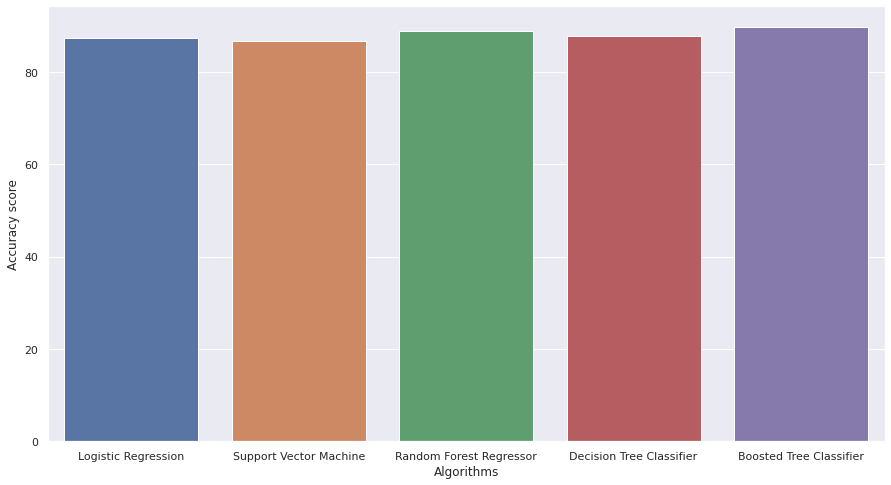

In [45]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [46]:
boosted_tree.predict(test[0])

dtype: int
Rows: 1
[0]

In [47]:
test[0]

{'age': 40,
 'sex': 1,
 'cp': 3,
 'trestbps': 124.76,
 'chol': 186.25,
 'fbs': 0,
 'restecg': 0,
 'thalach': 163.72,
 'exang': 0,
 'oldpeak': 1.05,
 'slope': 1,
 'ca': 1,
 'thal': 7,
 'num': 0}

In [48]:
inp={}
inp["age"]=40
inp["sex"]=1
inp["cp"]=3
inp["trestbps"]=124.757402
inp["chol"]=186.246056
inp["fbs"]=0
inp["restecg"]=0
inp["thalach"]=163.720491
inp["exang"]=0
inp["oldpeak"]=1.048416
inp["slope"]=1
inp["ca"]=1
inp["thal"]=7


In [49]:
boosted_tree.predict(inp)

dtype: int
Rows: 1
[0]

In [50]:
boosted_tree.save("boosted.model")

In [51]:
heart.export_csv("modified.csv")

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [53]:
df = pd.read_csv('modified.csv') 
print(df.shape)
df.describe().transpose()

(1000000, 14)


,count,mean,std,min,25%,50%,75%,max
age,1000000.0,53.850164,9.080700,26.00,48.00,55.00,60.00,81.00
sex,1000000.0,0.680412,0.466317,0.00,0.00,1.00,1.00,1.00
cp,1000000.0,3.144975,0.963717,1.00,3.00,3.00,4.00,4.00
trestbps,1000000.0,131.623873,17.532992,84.03,120.39,130.04,139.95,210.08
chol,1000000.0,246.332456,51.800403,100.76,213.28,240.81,271.57,529.66
fbs,1000000.0,0.152659,0.359659,0.00,0.00,0.00,0.00,1.00
restecg,1000000.0,0.986189,0.990967,0.00,0.00,1.00,2.00,2.00
thalach,1000000.0,149.622780,22.884596,62.09,136.05,153.09,165.73,211.39
exang,1000000.0,0.333809,0.471573,0.00,0.00,0.00,1.00,1.00
oldpeak,1000000.0,1.043065,1.161007,-0.64,0.00,0.76,1.66,6.96


In [54]:
target_column = ['num'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1000000.0,0.664817,0.112107,0.320988,0.592593,0.679012,0.740741,1.0
sex,1000000.0,0.680412,0.466317,0.000000,0.000000,1.000000,1.000000,1.0
cp,1000000.0,0.786244,0.240929,0.250000,0.750000,0.750000,1.000000,1.0
trestbps,1000000.0,0.626542,0.083459,0.399990,0.573067,0.619002,0.666175,1.0
chol,1000000.0,0.465077,0.097799,0.190235,0.402673,0.454650,0.512725,1.0
fbs,1000000.0,0.152659,0.359659,0.000000,0.000000,0.000000,0.000000,1.0
restecg,1000000.0,0.493094,0.495483,0.000000,0.000000,0.500000,1.000000,1.0
thalach,1000000.0,0.707804,0.108258,0.293723,0.643597,0.724206,0.784001,1.0
exang,1000000.0,0.333809,0.471573,0.000000,0.000000,0.000000,1.000000,1.0
oldpeak,1000000.0,0.149866,0.166811,-0.091954,0.000000,0.109195,0.238506,1.0


In [55]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(700000, 13)
(300000, 13)


In [56]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[338399  40766]
 [ 36406 284429]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90    379165
           1       0.87      0.89      0.88    320835

    accuracy                           0.89    700000
   macro avg       0.89      0.89      0.89    700000
weighted avg       0.89      0.89      0.89    700000



In [58]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[144914  17357]
 [ 15896 121833]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90    162271
           1       0.88      0.88      0.88    137729

    accuracy                           0.89    300000
   macro avg       0.89      0.89      0.89    300000
weighted avg       0.89      0.89      0.89    300000



In [59]:
import joblib
filename="finalized.sav"

In [60]:
joblib.dump(mlp,open(filename,"wb"))